In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Zeszyt1.xlsx')

In [3]:
df.head()

,DS.,y
0,2017-01-01,NaN
1,2017-01-02,789.0
2,2017-01-03,800.0
3,2017-01-04,767.0
4,2017-01-05,692.0


In [4]:
df['y'].fillna(0, inplace=True)
df.head()

,DS.,y
0,2017-01-01,0.0
1,2017-01-02,789.0
2,2017-01-03,800.0
3,2017-01-04,767.0
4,2017-01-05,692.0


In [5]:

df['DS.'] = pd.DatetimeIndex(df['DS.'])
df.dtypes

DS.    datetime64[ns]
y             float64
dtype: object

In [6]:
df = df.rename(columns={'DS.': 'ds'})

Czas sprawdzić jak wyglądają dane na wykresie

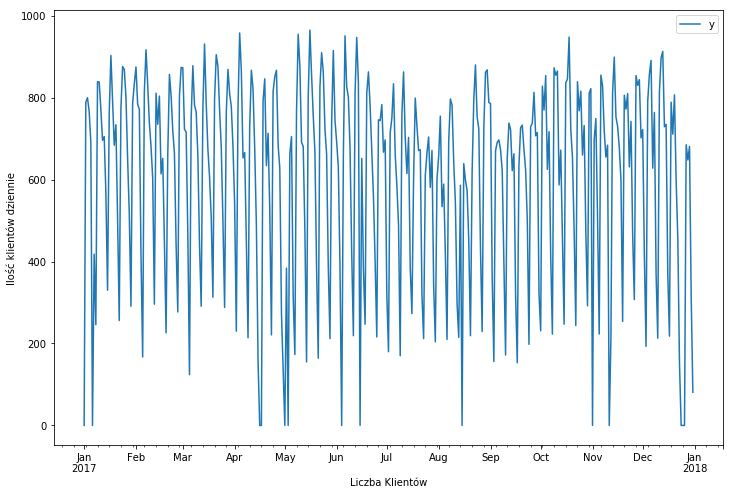

In [7]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Ilość klientów dziennie')
ax.set_xlabel('Liczba Klientów')

plt.show()

In [8]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Ok, czas na forecast

In [9]:
future_dates = my_model.make_future_dataframe(periods=59) #59 dni - dokładnie 2 pierwsze miesiące roku
future_dates.tail()

,ds
419,2018-02-24
420,2018-02-25
421,2018-02-26
422,2018-02-27
423,2018-02-28


In [10]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #trzy najważniejsze kolumny wynikowe

,ds,yhat,yhat_lower,yhat_upper
419,2018-02-24,372.154745,100.586071,623.644138
420,2018-02-25,166.229016,-101.934800,454.832962
421,2018-02-26,674.745518,401.915267,936.689000
422,2018-02-27,754.761175,451.425755,1050.384669
423,2018-02-28,737.812018,445.802907,1010.117099


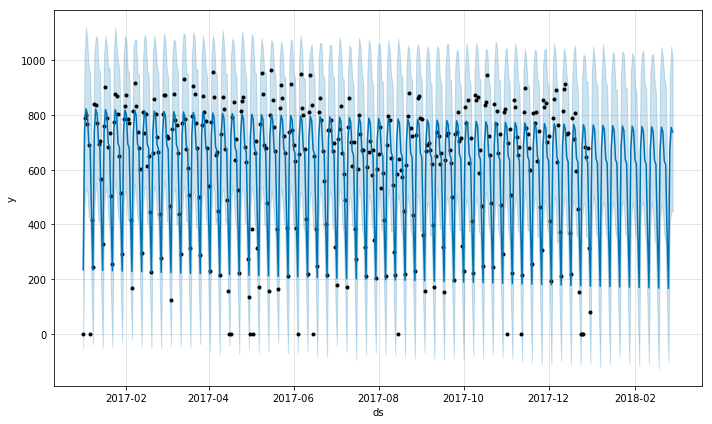

In [11]:
my_model.plot(forecast, uncertainty=True);

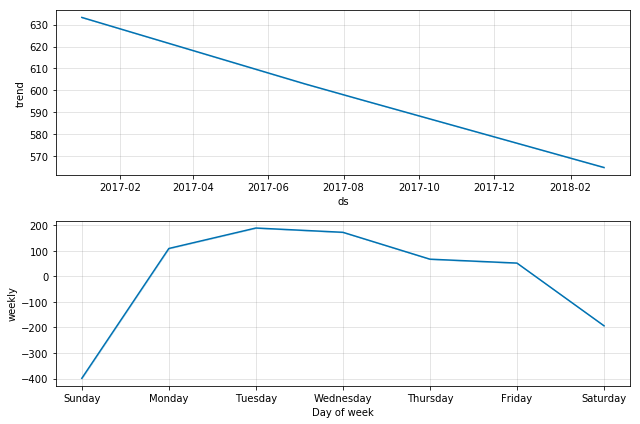

In [12]:
my_model.plot_components(forecast); # jeszcze odrobina statystyki opisującej.


In [13]:
#forecast = forecast.loc[lambda forecast: forecast['ds'].dt.dayofweek < 5, :] # wycinamy niedziele

In [14]:
writer = pd.ExcelWriter('Forecast.xlsx', engine='xlsxwriter')
forecast.to_excel(writer, sheet_name='Sheet1')
writer.save()